<a href="https://colab.research.google.com/github/Faith-Mueni/Machine-learning/blob/main/Credit_risk_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import requests
import itertools
import random
warnings.filterwarnings('ignore')

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:

df = pd.read_csv('/content/raw-data (1).csv')
df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24,0,2432,46500,24,1385,SC,...,NaN,NaN,46500.0,NaN,NaN,0.0,0.0,0.0,TIER 1,0.0
1,2,0,1,24,1,1495,28168,24,2496,MO,...,NaN,NaN,28168.0,NaN,NaN,0.0,0.0,0.0,TIER 1,0.0
2,3,0,0,26,0,1707,38900,30,1346,SC,...,NaN,105000.0,38900.0,34.0,31.0,31.0,31.0,16.0,TIER 1,0.0
3,4,0,0,24,0,2128,42900,24,1375,SC,...,NaN,NaN,42900.0,NaN,NaN,0.0,0.0,0.0,TIER 1,0.0
4,5,0,0,27,0,1824,40900,30,4140,MC,...,NaN,NaN,40900.0,NaN,NaN,0.0,0.0,0.0,TIER 1,0.0


###Data Quality/Data Cleaning

In [ ]:
df = df.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI',
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler',
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18667 entries, 0 to 18666
Data columns (total 28 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Customer ID                                                     18667 non-null  int64  
 1   Customer has bounced in first EMI                               18667 non-null  int64  
 2   No of times bounced 12 months                                   18667 non-null  int64  
 3   Maximum MOB                                                     18667 non-null  int64  
 4   No of times bounced while repaying the loan                     18667 non-null  int64  
 5   EMI                                                             18667 non-null  int64  
 6   Loan Amount                                                     18667 non-null  int64  
 7   Tenure                                           

###Data Preprocessing

In [ ]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head(1)

,customer_id,customer_has_bounced_in_first_emi,no_of_times_bounced_12_months,maximum_mob,no_of_times_bounced_while_repaying_the_loan,emi,loan_amount,tenure,dealer_codes_from_where_customer_has_purchased_the_two_wheeler,product_code_of_two_wheeler,...,no_of_secured_loans,no_of_unsecured_loans,max_amount_sanctioned_in_the_live_loans,no_of_new_loans_in_last_3_months,maximum_amount_sanctioned_for_any_two_wheeler_loan,no_of_times_30_days_past_due_in_last_6_months,no_of_times_60_days_past_due_in_last_6_months,no_of_times_90_days_past_due_in_last_3_months,tier,target_variable
0,1,0,0,24,0,2432,46500,24,1385,SC,...,1,0,84700.0,0,46500.0,0.0,0.0,0.0,TIER 1,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18667 entries, 0 to 18666
Data columns (total 28 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   customer_id                                                     18667 non-null  int64  
 1   customer_has_bounced_in_first_emi                               18667 non-null  int64  
 2   no_of_times_bounced_12_months                                   18667 non-null  int64  
 3   maximum_mob                                                     18667 non-null  int64  
 4   no_of_times_bounced_while_repaying_the_loan                     18667 non-null  int64  
 5   emi                                                             18667 non-null  int64  
 6   loan_amount                                                     18667 non-null  int64  
 7   tenure                                           

In [ ]:
df.describe()

,customer_id,customer_has_bounced_in_first_emi,no_of_times_bounced_12_months,maximum_mob,no_of_times_bounced_while_repaying_the_loan,emi,loan_amount,tenure,dealer_codes_from_where_customer_has_purchased_the_two_wheeler,no_of_advance_emi_paid,...,no_of_loans,no_of_secured_loans,no_of_unsecured_loans,max_amount_sanctioned_in_the_live_loans,no_of_new_loans_in_last_3_months,maximum_amount_sanctioned_for_any_two_wheeler_loan,no_of_times_30_days_past_due_in_last_6_months,no_of_times_60_days_past_due_in_last_6_months,no_of_times_90_days_past_due_in_last_3_months,target_variable
count,18667.000000,18667.000000,18667.000000,18667.000000,18667.000000,18667.000000,18667.000000,18667.000000,18667.000000,18667.000000,...,18667.000000,18667.000000,18667.000000,1.866700e+04,18667.0,18667.000000,18667.000000,18667.000000,18667.000000,18667.000000
mean,9334.000000,0.031071,0.577972,21.768201,0.938394,2171.832592,42096.818235,24.871163,2320.152890,0.654470,...,3.692773,2.312691,0.984411,1.427293e+05,0.0,43161.228799,1.663042,1.296138,0.546740,0.025767
std,5388.843073,0.173514,0.964473,5.127988,1.293506,502.242087,10058.594454,5.330666,1072.618229,0.961861,...,7.091189,5.801596,2.493691,3.405771e+05,0.0,11470.973230,4.573135,3.962801,1.877531,0.158445
min,1.000000,0.000000,0.000000,7.000000,0.000000,681.000000,15000.000000,8.000000,1001.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000e+00,0.0,15000.000000,0.000000,0.000000,0.000000,0.000000
25%,4667.500000,0.000000,0.000000,19.000000,0.000000,1775.000000,32585.000000,24.000000,1377.000000,0.000000,...,1.000000,1.000000,0.000000,8.470000e+04,0.0,35900.000000,0.000000,0.000000,0.000000,0.000000
50%,9334.000000,0.000000,0.000000,21.000000,1.000000,2183.000000,44000.000000,24.000000,2007.000000,0.000000,...,2.000000,1.000000,0.000000,8.470000e+04,0.0,44700.000000,0.000000,0.000000,0.000000,0.000000
75%,14000.500000,0.000000,1.000000,24.000000,1.000000,2507.000000,48900.000000,24.000000,3116.000000,1.000000,...,4.000000,2.000000,1.000000,8.470000e+04,0.0,49400.000000,1.000000,0.000000,0.000000,0.000000
max,18667.000000,1.000000,12.000000,36.000000,29.000000,6305.000000,80500.000000,36.000000,4981.000000,6.000000,...,421.000000,416.000000,39.000000,2.407262e+07,0.0,522000.000000,133.000000,131.000000,64.000000,1.000000


Text(0.5, 1.0, 'Missing Values Heatmap')

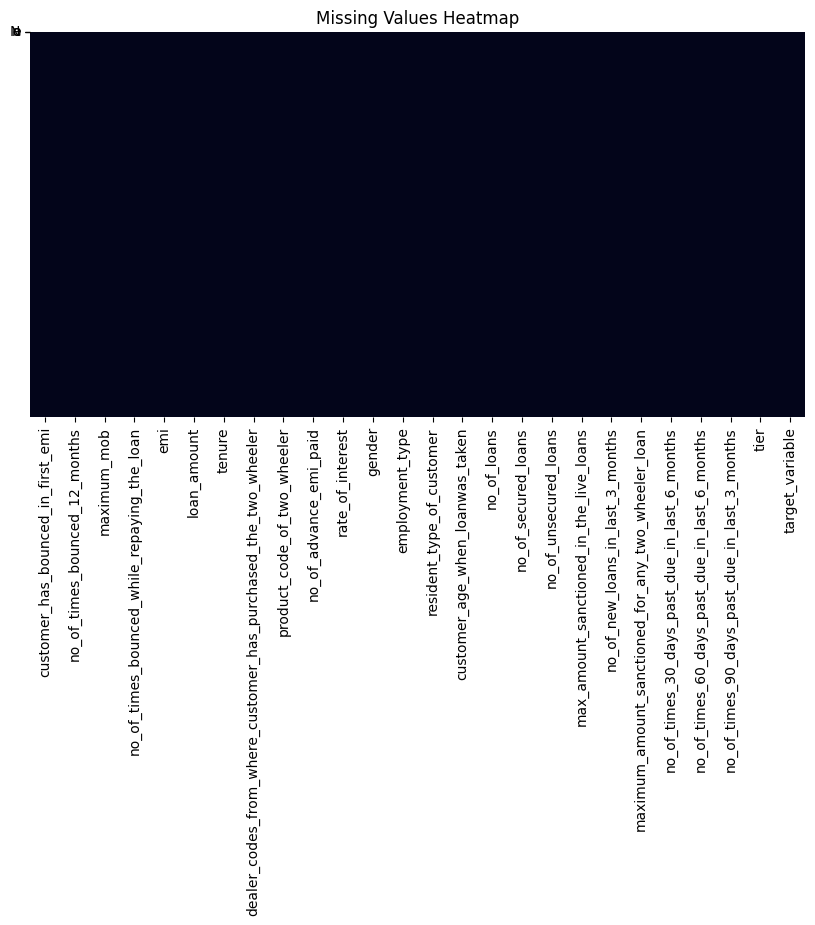

In [ ]:
plt.figure(figsize=(10,5))

sns.heatmap(df.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

In [ ]:
df.drop(['customer_id','date_of_birth'], axis=1, inplace=True)

# Separating the numerical variables from the categorical variables, in case we need to treat them separately
num_var=df.select_dtypes(include=[np.number])
cat_var=df.select_dtypes(include=[object])


###EDA

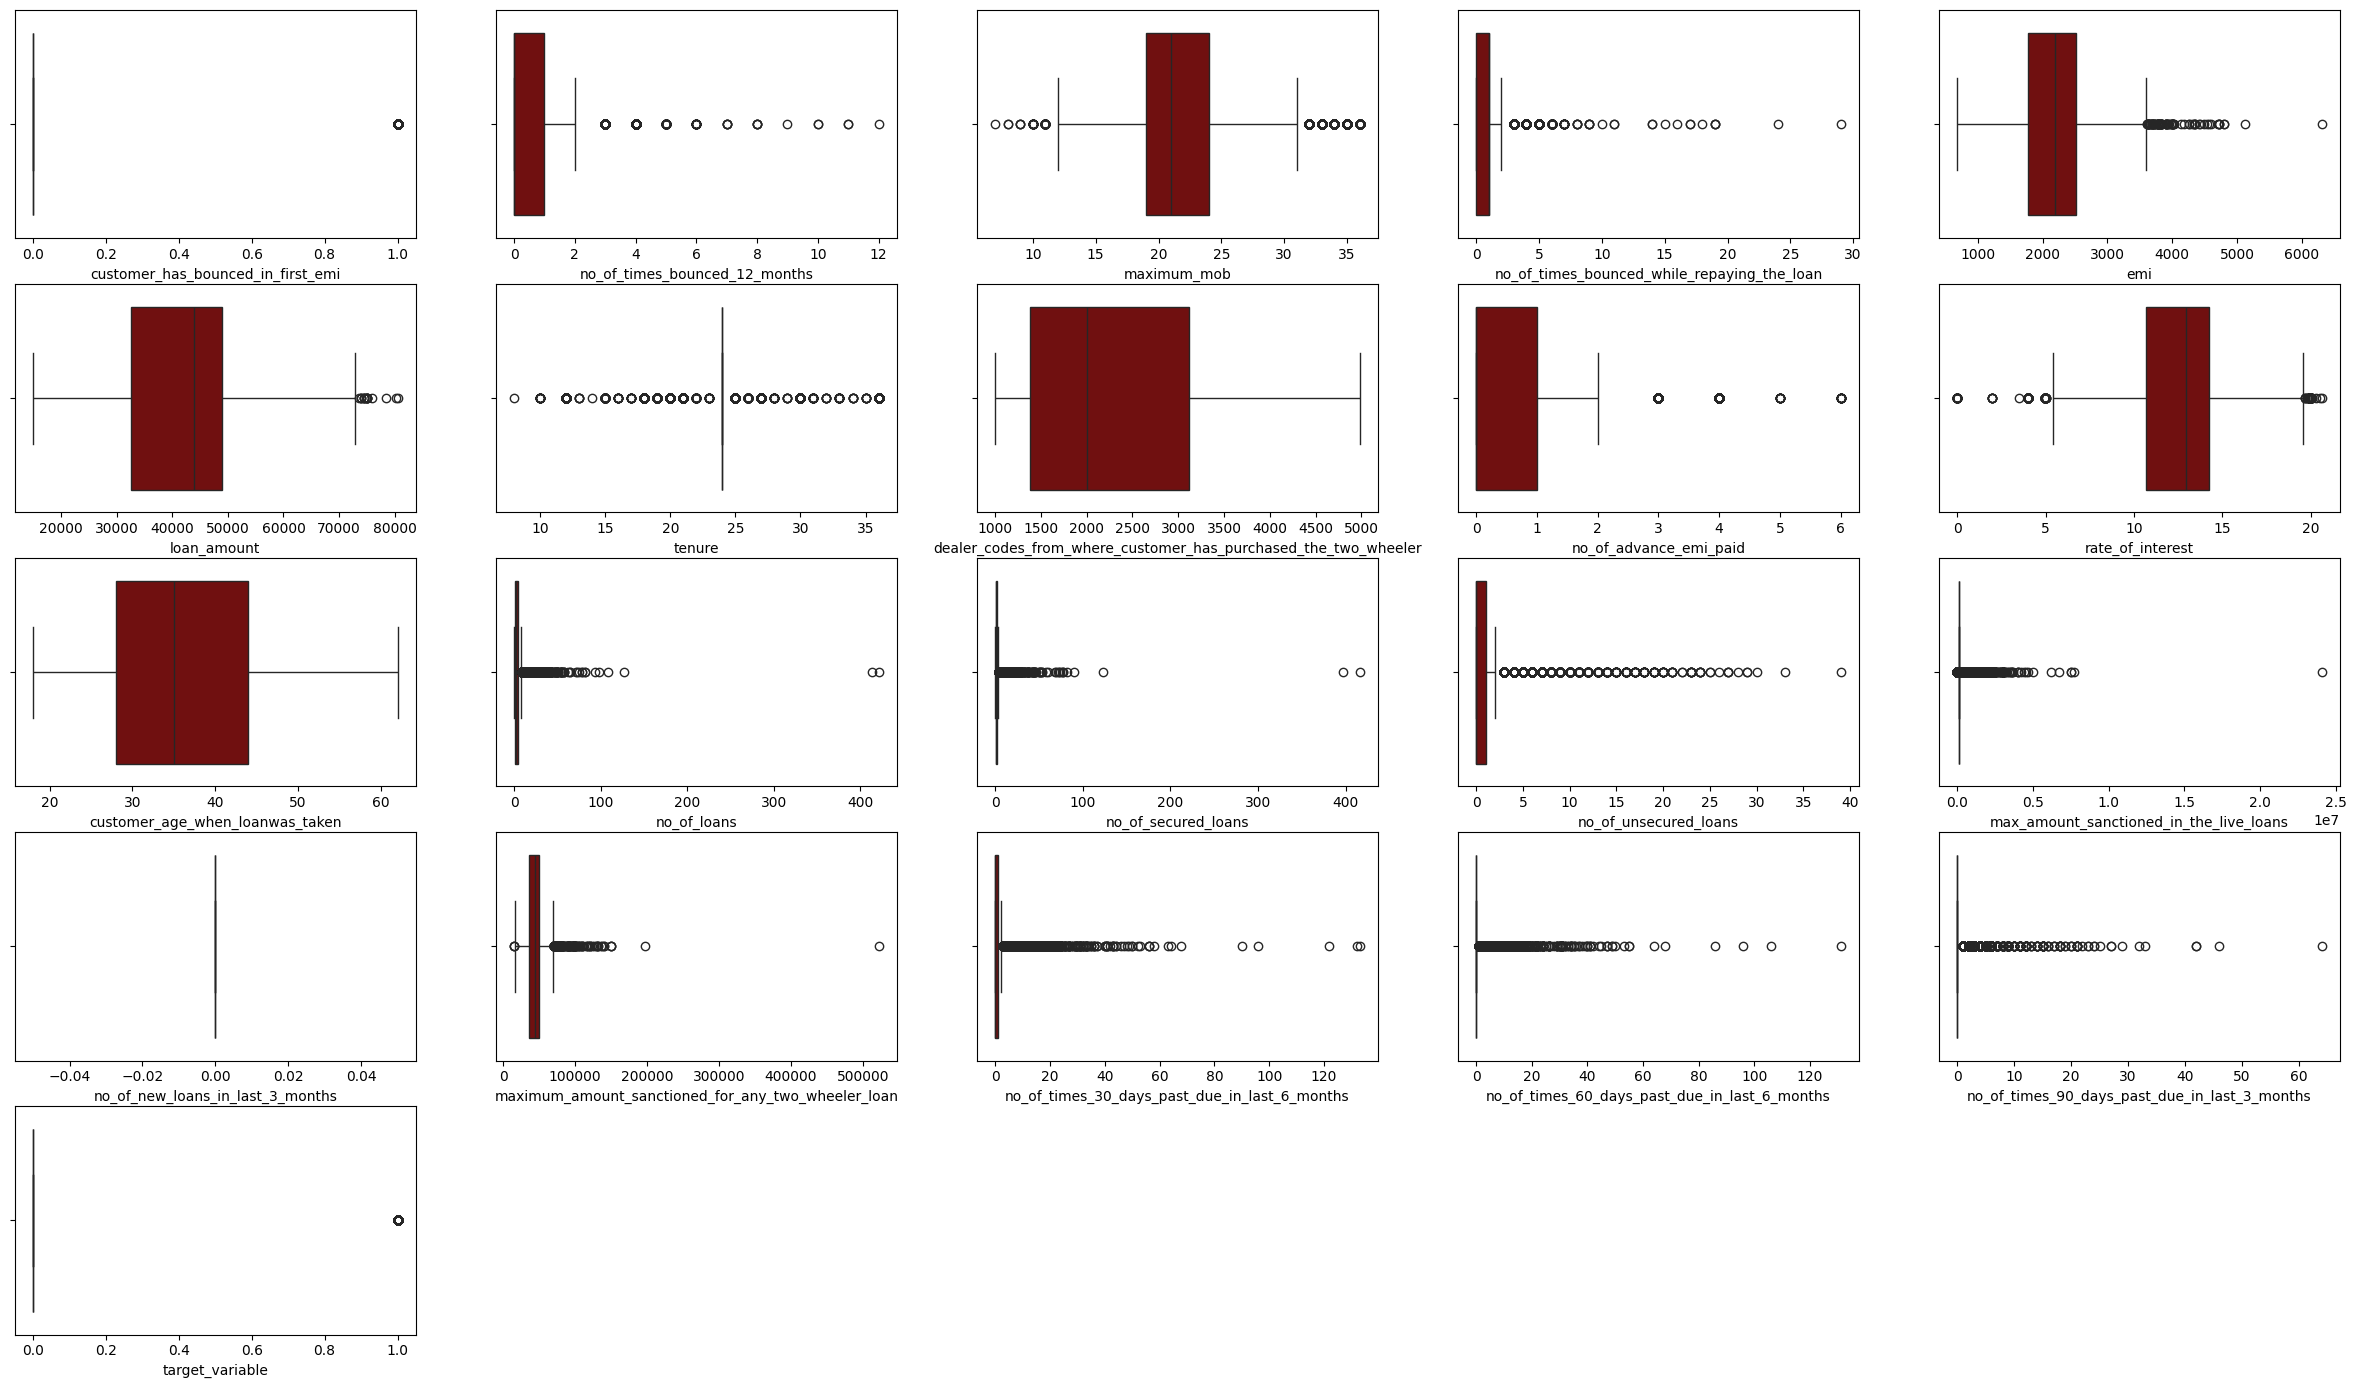

In [ ]:
fig = plt.figure(figsize=(30,35))
for i,j in zip(num_var,range(len(num_var.columns))):
    ax = fig.add_subplot(10,5, j+1)
    sns.boxplot(data=df,x=df[i],orient='v',color="Maroon")

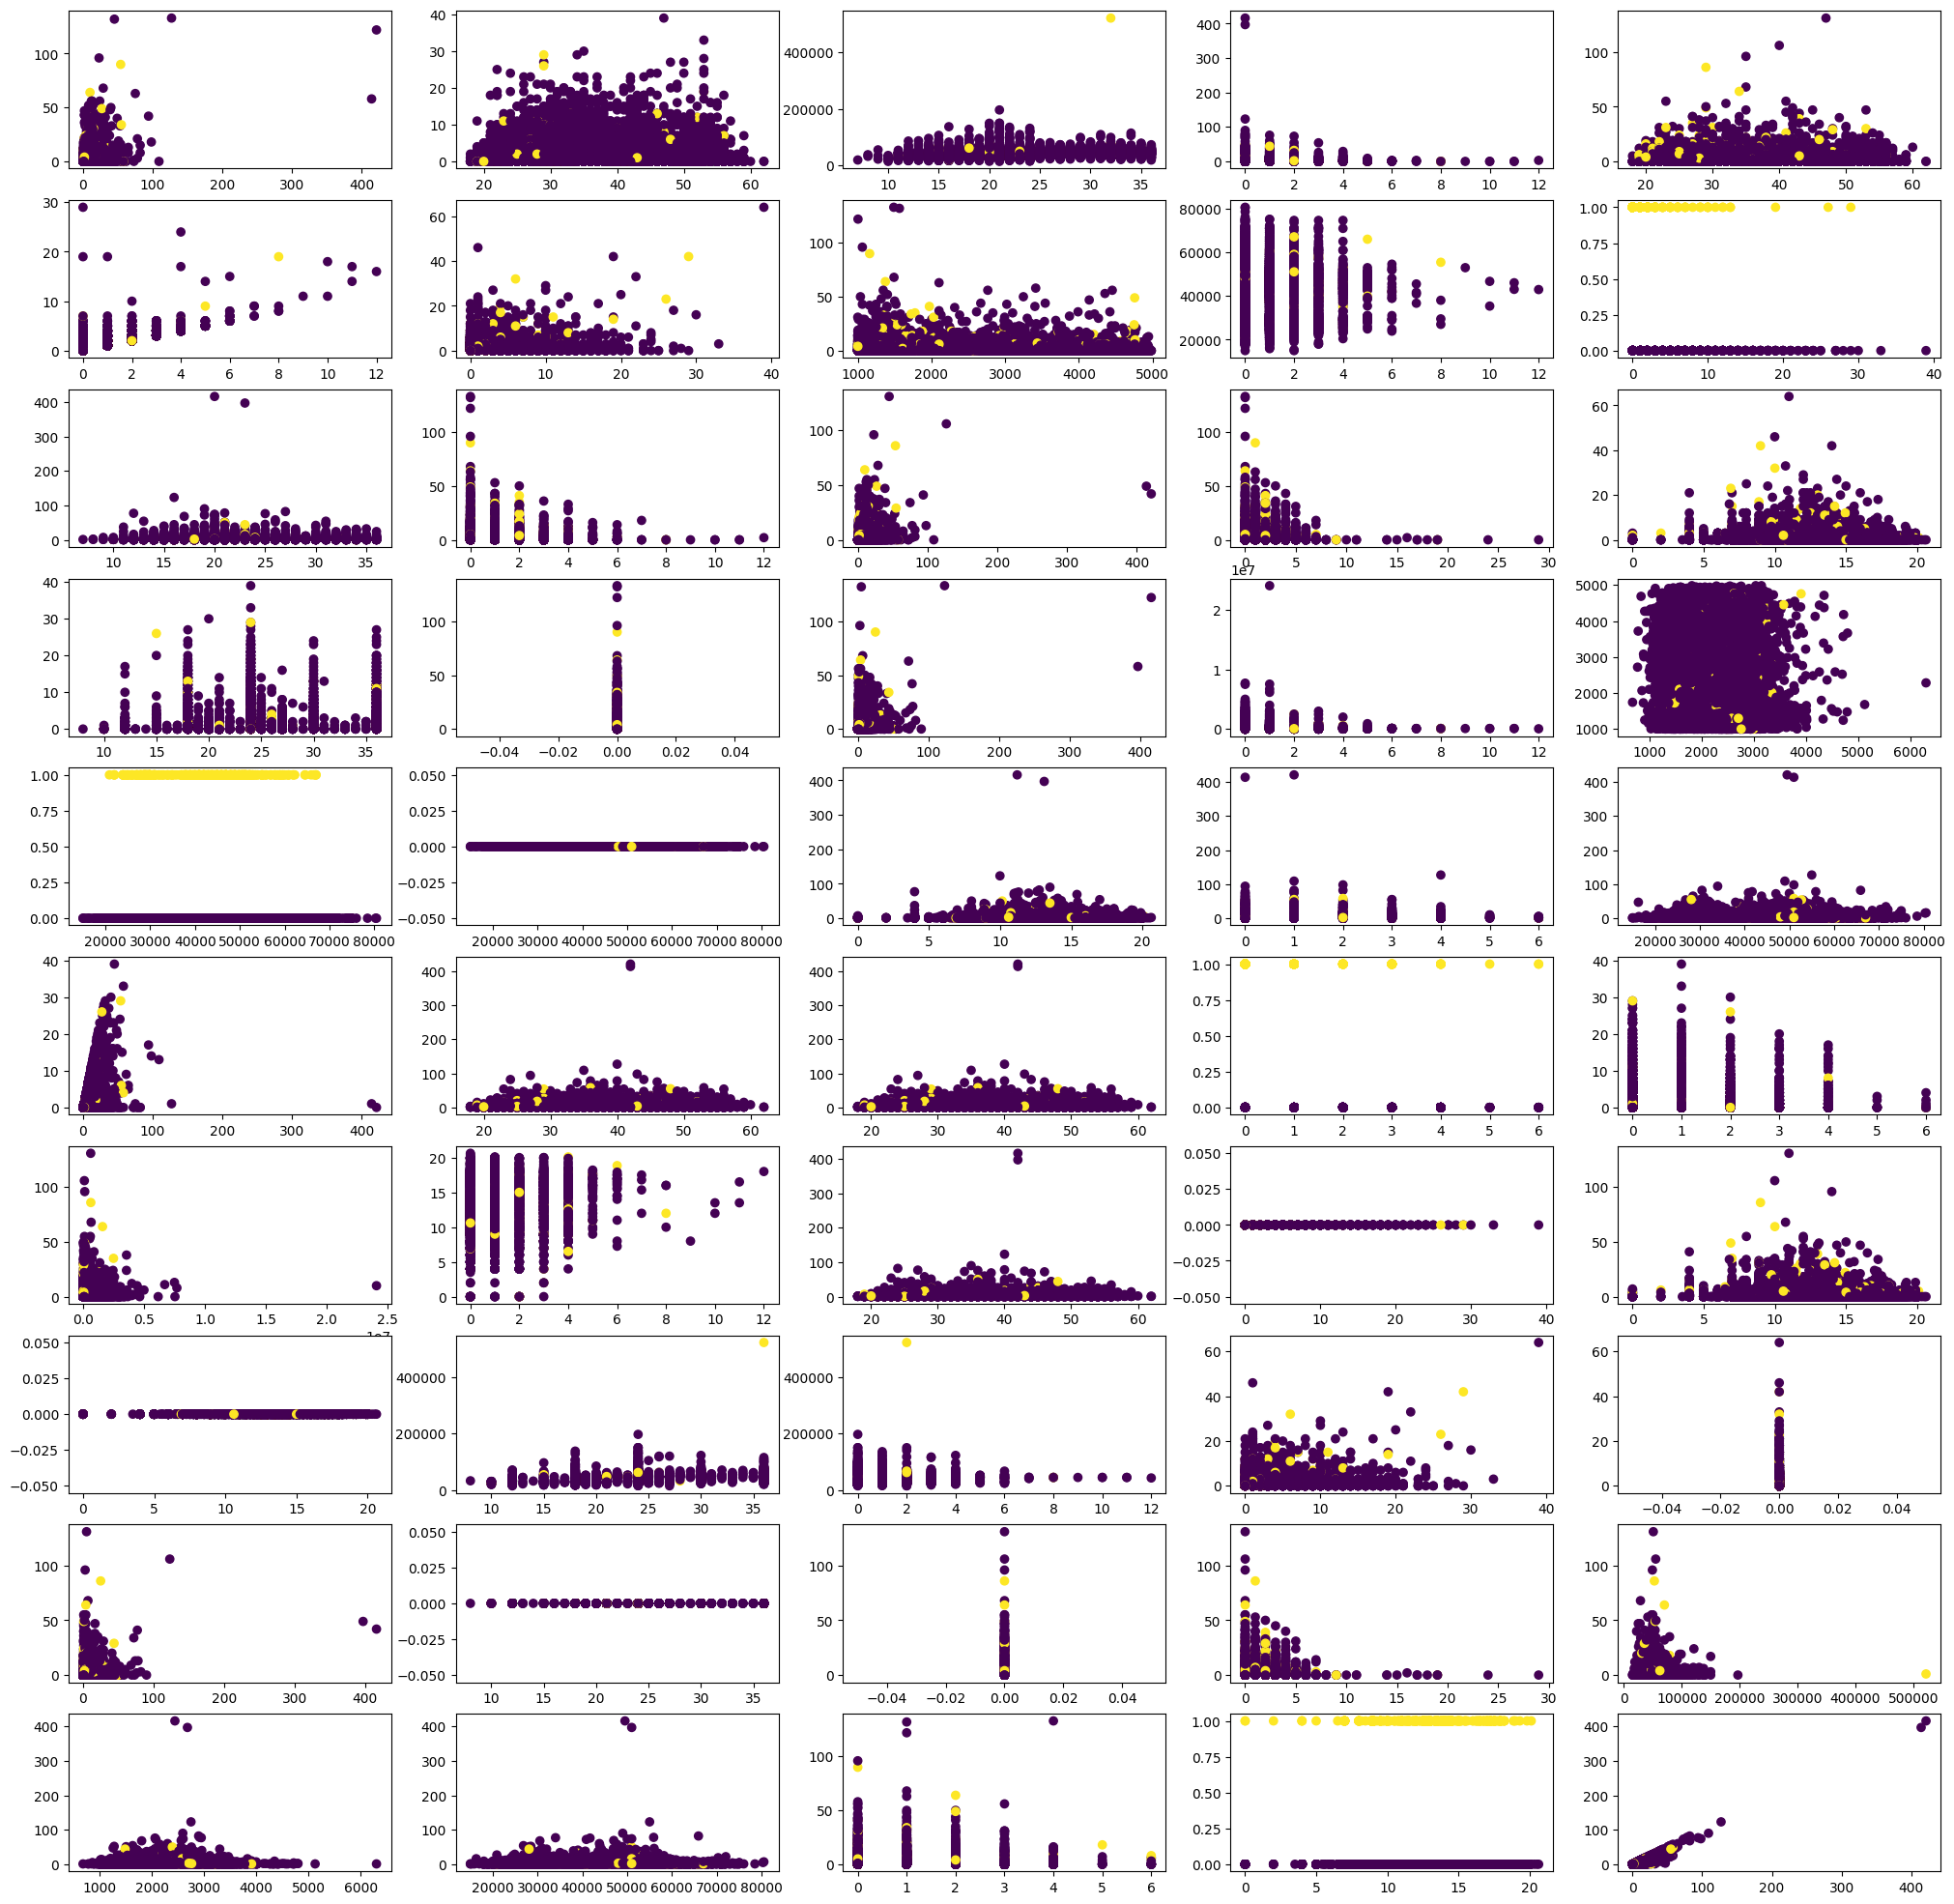

In [ ]:
comb = list(itertools.combinations([a for a in range(1, len(num_var.columns))], 2)) #Create combinations of all features, in twos (bivariate)
rand = random.choices(comb, k=50) #Randomly choose 50 bivariate relationships to visualise. Total bivariate relationships (465 = 30C2) is too much
df['target_variable'] = df['target_variable'].astype('int') # Convert our tarrget variable to categorical because it is classification.

fig = plt.figure(figsize=(25,25))
for i in range(len(rand)):
    ax = fig.add_subplot(10,5, i+1)
    plt.scatter(num_var[num_var.columns[rand[i][0]]],num_var[num_var.columns[rand[i][1]]],c=df.target_variable)

Text(0.5, 1.0, 'Ratio of Customers Who Defaulted and Who did Not')

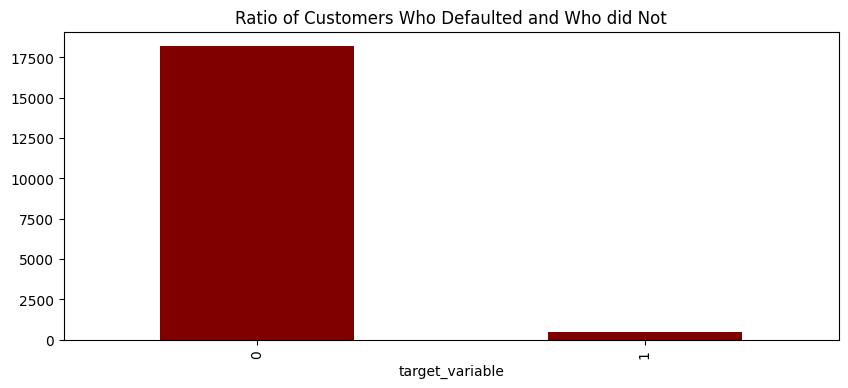

In [ ]:
df.target_variable.value_counts().plot(kind = "bar", figsize = (10,4),color='Maroon')
plt.title("Ratio of Customers Who Defaulted and Who did Not")

In [ ]:
df.dropna(thresh=df.shape[0]*0.5,axis=1, inplace = True)

## For other columns we are doing a mean for nume and mode for the cat
fill = dict()

for i in range(len(df.columns)):

    if df.columns[i] in num_var:
        fill[df.columns[i]] = df[df.columns[i]].mean()

    else:
        fill[df.columns[i]] = str(df[df.columns[i]].mode()).split()[1]

print(len(fill))
df = df.fillna(value=fill)

26


###encoding

In [ ]:
# prompt: one hot encode df data set

col_tr = make_column_transformer((OrdinalEncoder(),['tier']),(OneHotEncoder(), ['product_code_of_two_wheeler','gender','employment_type','resident_type_of_customer']), remainder="passthrough")
df_transformed = col_tr.fit_transform(df)

print(df_transformed.shape)


(18667, 35)


In [ ]:
pd.DataFrame(df_transformed).head(1)


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,84700.0,0.0,46500.0,0.0,0.0,0.0,0.0


In [ ]:
X = df_transformed[:,:40]
y = df.target_variable
print(X.shape,y.shape)

(18667, 35) (18667,)


In [ ]:
smote_sample=SMOTE(random_state=124,sampling_strategy='auto')
X, y=smote_sample.fit_resample(X,y)


###scaling

###Split Data:


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25460, 35) (10912, 35) (25460,) (10912,)


###Model Selection and Training:



In [ ]:
pipe = make_pipeline(PolynomialFeatures(degree=1),LogisticRegression(penalty='none', solver='lbfgs'))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.71563236 0.70365279 0.78809898 0.71327573 0.57501964] 0.6991358994501178


In [ ]:
pipe = make_pipeline(PolynomialFeatures(degree=1), SVC(kernel='rbf',C=5))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.54595444 0.52867243 0.53888452 0.54183032 0.54536528] 0.5401413982717989


In [ ]:
pipe = make_pipeline(PolynomialFeatures(degree=1),RandomForestClassifier())
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

NameError: name 'RandomForestClassifier' is not defined

###Model Evaluation:



In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

matrix = confusion_matrix(y_test, y_pred)

#Visualise the matrix
plt.figure(figsize=(10,5))
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.title("Confusion Matrix for Model We have Selected to Tune")
plt.show()

matrix

###Hyperparameter tuning

###prediction